
           PEAK DEMAND STATISTICS (Last 30 Days)            
Max Peak: 412.0 kWh on 2025-04-12
Average Peak: 300.6 kWh
Min Peak: 164.1 kWh
Peak Range: 247.9 kWh
Peak Occurred At: 15:00 (on 2025-04-12)


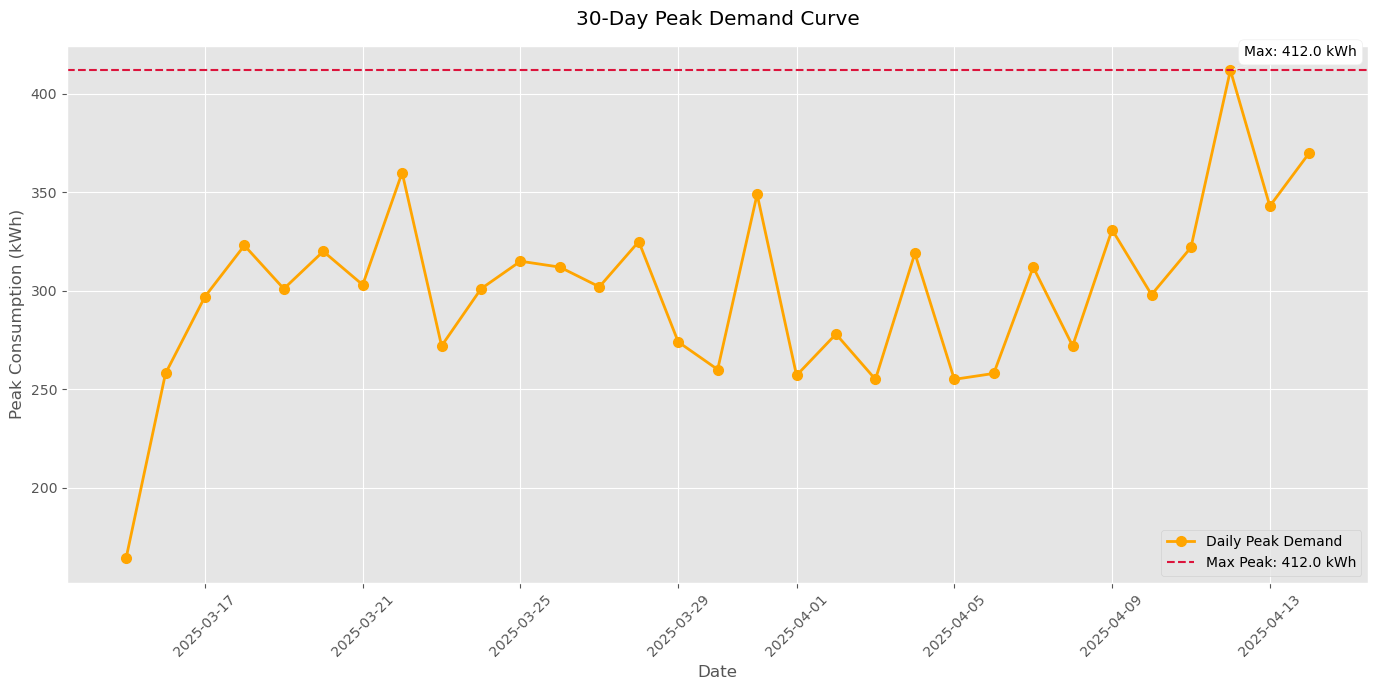

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('ggplot')  # Reliable, always available
plt.rcParams.update({
    'figure.figsize': (14, 7),
    'axes.titlepad': 15,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})


df = pd.read_csv("E:/final.csv", parse_dates=['Datetime'])
df = df.sort_values('Datetime')


df.set_index('Datetime', inplace=True)


last_30_days = df.loc[df.index >= df.index.max() - pd.Timedelta(days=30)]


daily_peaks = last_30_days['Consumption'].resample('D').max()


fig, ax = plt.subplots()

ax.plot(daily_peaks.index, daily_peaks,
        marker='o', linestyle='-', color='orange',
        linewidth=2, markersize=7, label='Daily Peak Demand')


max_peak = daily_peaks.max()
max_date = daily_peaks.idxmax()
ax.axhline(max_peak, color='crimson', linestyle='--', linewidth=1.5,
           label=f'Max Peak: {max_peak:.1f} kWh')

ax.annotate(f'Max: {max_peak:.1f} kWh',
            xy=(max_date, max_peak),
            xytext=(10, 10),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->'),
            bbox=dict(boxstyle='round,pad=0.4', fc='white'))

# Labels
ax.set_title('30-Day Peak Demand Curve')
ax.set_xlabel('Date')
ax.set_ylabel('Peak Consumption (kWh)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# --- 5. Print Stats ---
print("\n" + "="*60)
print("PEAK DEMAND STATISTICS (Last 30 Days)".center(60))
print("="*60)
print(f"Max Peak: {max_peak:.1f} kWh on {max_date.date()}")
print(f"Average Peak: {daily_peaks.mean():.1f} kWh")
print(f"Min Peak: {daily_peaks.min():.1f} kWh")
print(f"Peak Range: {(daily_peaks.max() - daily_peaks.min()):.1f} kWh")


peak_ts = last_30_days['Consumption'].idxmax()
peak_hour = peak_ts.hour
print(f"Peak Occurred At: {peak_hour}:00 (on {peak_ts.date()})")

plt.show()
